In [145]:
import plotly.express as px
import pandas as pd
#import plotly.graph_objects as go
import numpy as np

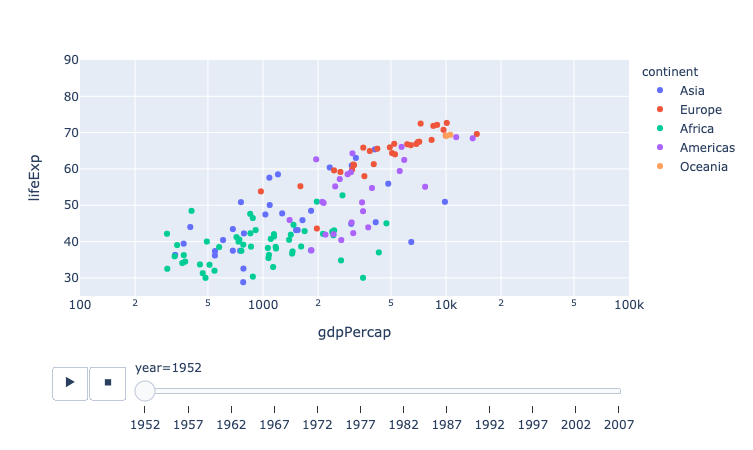

In [146]:
bd = px.data.gapminder()
fig = px.scatter(bd, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country", color="continent", hover_name="country", log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()


In [147]:
bd = pd.read_csv("/users/uneku/downloads/2_bloodpressure_plotly.csv")
bd.head()

,Country/Region/World,ISO,Sex,Year,Mean systolic blood pressure (mmHg),Mean diastolic blood pressure (mmHg),Prevalence of raised blood pressure
0,Afghanistan,AFG,Men,1975,121.078635,76.217903,0.251041
1,Afghanistan,AFG,Men,1976,121.213135,76.302381,0.252482
2,Afghanistan,AFG,Men,1977,121.352221,76.389730,0.254044
3,Afghanistan,AFG,Men,1978,121.493430,76.479429,0.255709
4,Afghanistan,AFG,Men,1979,121.636601,76.570570,0.257459


In [148]:
bd2 = bd.drop(['Sex', 'Year','Prevalence of raised blood pressure'], axis=1)


In [149]:
bd2 = bd2.rename(columns={'Country/Region/World': 'Country', 'Mean systolic blood pressure (mmHg)':'SBP', 'Mean diastolic blood pressure (mmHg)':'DBP'}, inplace = False)
bd2.head()

,Country,ISO,SBP,DBP
0,Afghanistan,AFG,121.078635,76.217903
1,Afghanistan,AFG,121.213135,76.302381
2,Afghanistan,AFG,121.352221,76.389730
3,Afghanistan,AFG,121.493430,76.479429
4,Afghanistan,AFG,121.636601,76.570570


In [150]:
bd2.groupby(['Country']).mean().round()

,SBP,DBP
Country,,
Afghanistan,123.0,78.0
Albania,131.0,82.0
Algeria,128.0,78.0
American Samoa,130.0,81.0
Andorra,127.0,79.0
...,...,...
Venezuela,127.0,79.0
Viet Nam,121.0,75.0
Yemen,126.0,77.0


In [151]:
#bd2.to_csv('newissh.csv', index= False, header = True)

In [152]:
new = pd.read_csv("newissh.csv")
new.head()

,Country,ISO,SBP,DBP
0,Afghanistan,AFG,121.078635,76.217903
1,Afghanistan,AFG,121.213135,76.302381
2,Afghanistan,AFG,121.352221,76.389730
3,Afghanistan,AFG,121.493430,76.479429
4,Afghanistan,AFG,121.636601,76.570570


In [153]:
#new.insert(3,'HIGH_SBP',new.SBP >= 130)


In [154]:
new.head()

,Country,ISO,SBP,DBP
0,Afghanistan,AFG,121.078635,76.217903
1,Afghanistan,AFG,121.213135,76.302381
2,Afghanistan,AFG,121.352221,76.389730
3,Afghanistan,AFG,121.493430,76.479429
4,Afghanistan,AFG,121.636601,76.570570


In [155]:
new['BP_Status']= np.where(new['SBP'] >= 130, 'HIGH', 'LOW')
new.head()

,Country,ISO,SBP,DBP,BP_Status
0,Afghanistan,AFG,121.078635,76.217903,LOW
1,Afghanistan,AFG,121.213135,76.302381,LOW
2,Afghanistan,AFG,121.352221,76.389730,LOW
3,Afghanistan,AFG,121.493430,76.479429,LOW
4,Afghanistan,AFG,121.636601,76.570570,LOW


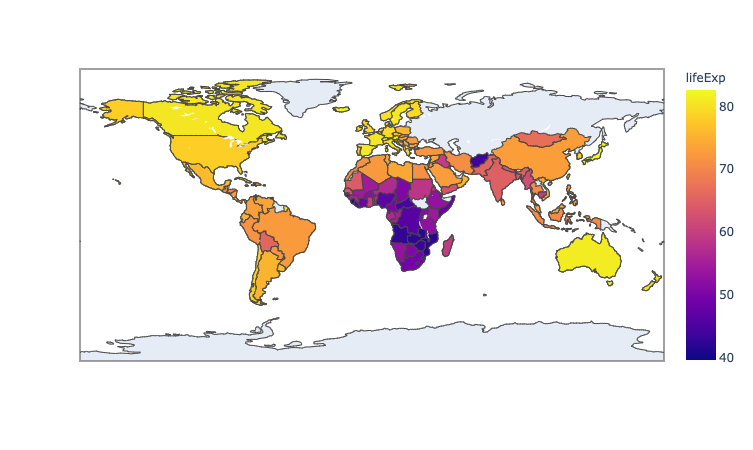

In [156]:
import plotly.express as px
 
new = px.data.gapminder().query("year==2007")
fig = px.choropleth(new, locations="iso_alpha",
                    color="lifeExp",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


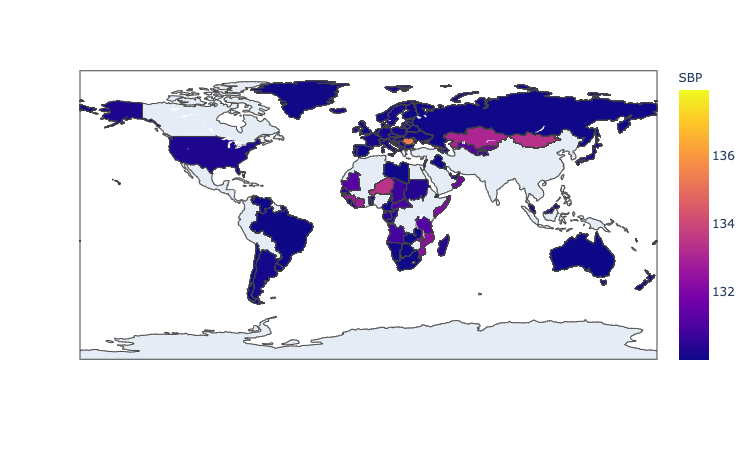

In [162]:
HBP.get('BP_Status')== 'HIGH'
#HBP = new[new["BP_Status"] == 'HIGH']
fig=px.choropleth(HBP, locations='ISO', color ='SBP', hover_name ='Country', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()